In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image, image
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
import shutil
import random
import os

In [4]:
os.chdir("dataset")
if os.path.isdir("train") is False:
    os.mkdir("train")
    os.mkdir("valid")
    os.mkdir("test")

    for i in range(0, 10):
        shutil.move(f"{i}", "train")
        os.mkdir(f"valid/{i}")
        os.mkdir(f"test/{i}")

        valid_samples = random.sample(os.listdir(f"train/{i}"), 30)
        for j in valid_samples:
            shutil.move(f"train/{i}/{j}", f"valid/{i}")

        test_samples = random.sample(os.listdir(f"train/{i}"), 5)
        for t in test_samples:
            shutil.move(f"train/{i}/{t}", f"test/{i}")


In [5]:
train_batches = image.ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory='train', target_size=(224, 224), batch_size=10)
valid_batches = image.ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory='valid', target_size=(224, 224), batch_size=10)
test_batches = image.ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory='test', target_size=(224, 224), batch_size=10, shuffle=False)


Found 1712 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [6]:
mobilenet = tf.keras.applications.mobilenet.MobileNet()
mobilenet .summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [7]:
x = mobilenet.layers[-5].output
x = tf.keras.layers.Reshape(target_shape=(1024,))(x)

In [8]:
output = Dense(units=10,activation="softmax")(x)

In [9]:
model = Model(inputs=mobilenet.input, outputs=output)

In [10]:
for layer in model.layers[:-22]:
    layer.trainable = False

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [12]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(x=train_batches,
            steps_per_epoch=len(train_batches),
            validation_data=valid_batches,
            validation_steps=len(valid_batches),
            epochs=10,
            verbose=2)

Epoch 1/10
172/172 - 51s - loss: 0.6023 - accuracy: 0.8271 - val_loss: 0.3966 - val_accuracy: 0.8600 - 51s/epoch - 297ms/step
Epoch 2/10
172/172 - 50s - loss: 0.1063 - accuracy: 0.9871 - val_loss: 0.1270 - val_accuracy: 0.9733 - 50s/epoch - 291ms/step
Epoch 3/10
172/172 - 50s - loss: 0.0573 - accuracy: 0.9953 - val_loss: 0.0757 - val_accuracy: 0.9867 - 50s/epoch - 290ms/step
Epoch 4/10
172/172 - 58s - loss: 0.0312 - accuracy: 0.9977 - val_loss: 0.0588 - val_accuracy: 0.9833 - 58s/epoch - 335ms/step
Epoch 5/10
172/172 - 59s - loss: 0.0224 - accuracy: 0.9982 - val_loss: 0.0437 - val_accuracy: 0.9900 - 59s/epoch - 343ms/step
Epoch 6/10
172/172 - 55s - loss: 0.0175 - accuracy: 0.9982 - val_loss: 0.0581 - val_accuracy: 0.9833 - 55s/epoch - 318ms/step
Epoch 7/10
172/172 - 56s - loss: 0.0157 - accuracy: 0.9994 - val_loss: 0.0684 - val_accuracy: 0.9700 - 56s/epoch - 328ms/step
Epoch 8/10
172/172 - 50s - loss: 0.0083 - accuracy: 1.0000 - val_loss: 0.0267 - val_accuracy: 0.9967 - 50s/epoch - 289

In [14]:
test_labels = test_batches.classes
test_labels

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8,
       8, 9, 9, 9, 9, 9])

In [15]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=2)

5/5 - 1s - 1s/epoch - 273ms/step


In [16]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [17]:
print("Accuracy: ",accuracy_score(test_labels, predictions.argmax(axis=1)))

Accuracy:  1.0


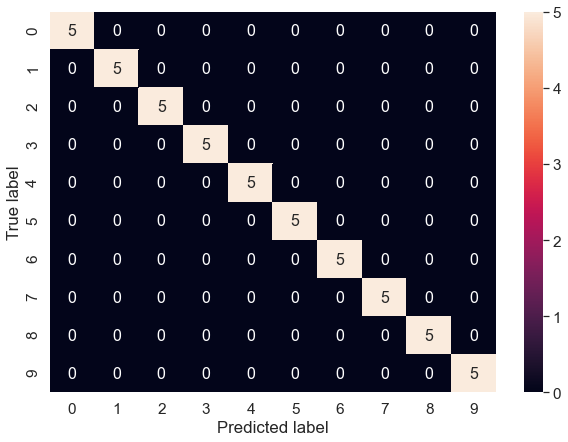

In [18]:
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) 
sns.heatmap(cm, annot=True, annot_kws={"size": 16}) 
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [19]:
model.save("sign language digits recognizer",save_format="h5")